# Data Cleaning: Census 2003-2018 Datasets
## Data downloaded from the census 2003-2018

The official nationwide census is conducted every 10 years, most recently in 2010 and 2020. Apart from these decennial census, federal and local government conduct smaller population census and surveys every year to better understand the regionals needs for services, such as healthcare and social services.

We have downloaded public datasets from the government websites. The unprocessed datasets are in either `.xls` or `.csv` format and can be found in the `Data` folder. Most files have additional datasheet or information of variables in the 2nd sheet. Datasets include:

1. <a href='#population'>Population estimates 2010-2018</a>: `pop_county`
2. <a href='#poverty'>Poverty estimates 2018</a>: `poverty_county`
3. <a href='#unemployment'>Unemployment rates 2007-2018</a>: `unemployment_county`
4. <a href='#education'>Education level 2014-2018</a>: `education_county`
5. <a href='#heart_disease'>Heart disease mortality rates</a>: `heart_mortality_county`
6. <a href='#stroke'>Stroke mortality rates</a>: `stroke_mortality_county`
7. <a href='#teen_birth'>Teen birth rates 2003-2018</a>: `teen_birth`
8. <a href='#internet'>High-speed Internet availability</a>: `internet`
9. <a href='#brfss'>Behavioral risk factor surveillence 2003-2010</a>: `brfss_county`

Each dataset represents census results from different counties in the United States. Counties are uniquely identified by their *Federal Identification Processing Standard* (FIPS). 
This notebook contains code to clean and <a href='#combination'>merge</a> information from these different datasets and prepare data for regression analysis.

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

<a id='population'></a>

## Population estimates

In [2]:
pop_est = pd.read_excel('../Data/census/County_PopulationEstimates.xls', header=2, dtype={'FIPS':str})

In [4]:
# FIPS are read as strings, but converting FIPS to integers can be easier for processing.
pop_est['FIPS_int'] = [int(fips) for fips in pop_est['FIPS'].values.tolist()]

In [5]:
# Current columns
list(pop_est.columns)

['FIPS',
 'State',
 'Area_Name',
 'Rural-urban_Continuum Code_2003',
 'Rural-urban_Continuum Code_2013',
 'Urban_Influence_Code_2003',
 'Urban_Influence_Code_2013',
 'Economic_typology_2015',
 'CENSUS_2010_POP',
 'ESTIMATES_BASE_2010',
 'POP_ESTIMATE_2010',
 'POP_ESTIMATE_2011',
 'POP_ESTIMATE_2012',
 'POP_ESTIMATE_2013',
 'POP_ESTIMATE_2014',
 'POP_ESTIMATE_2015',
 'POP_ESTIMATE_2016',
 'POP_ESTIMATE_2017',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2010',
 'N_POP_CHG_2011',
 'N_POP_CHG_2012',
 'N_POP_CHG_2013',
 'N_POP_CHG_2014',
 'N_POP_CHG_2015',
 'N_POP_CHG_2016',
 'N_POP_CHG_2017',
 'N_POP_CHG_2018',
 'Births_2010',
 'Births_2011',
 'Births_2012',
 'Births_2013',
 'Births_2014',
 'Births_2015',
 'Births_2016',
 'Births_2017',
 'Births_2018',
 'Deaths_2010',
 'Deaths_2011',
 'Deaths_2012',
 'Deaths_2013',
 'Deaths_2014',
 'Deaths_2015',
 'Deaths_2016',
 'Deaths_2017',
 'Deaths_2018',
 'NATURAL_INC_2010',
 'NATURAL_INC_2011',
 'NATURAL_INC_2012',
 'NATURAL_INC_2013',
 'NATURAL_INC_2014',
 '

In [6]:
# first 20 columns
pop_est.iloc[:,:20].head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,N_POP_CHG_2010
0,00000,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,309326085,311580009,313874218,316057727,318386421,320742673,323071342,325147121,327167434,567980.0
1,01000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780138,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,5310.0
2,01001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54574,54754,55208,54936,54713,54876,54838,55242,55443,55601,180.0
3,01003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182264,183111,186540,190143,194886,199189,202995,207712,212619,218022,847.0
4,01005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27457,27330,27350,27174,26944,26758,26294,25819,25158,24881,-127.0


In [7]:
# next 20 columns
pop_est.iloc[:,20:40].head()

,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Deaths_2010,Deaths_2011,Deaths_2012
0,2253924.0,2294209.0,2183509.0,2328694.0,2356252.0,2328669.0,2075779.0,2020313.0,987836.0,3973485.0,3936976.0,3940576.0,3963195.0,3992376.0,3962654.0,3901982.0,3855500.0,598691.0,2512442.0,2501531.0
1,13386.0,16730.0,14896.0,12021.0,10679.0,11585.0,10375.0,12751.0,14227.0,59689.0,59070.0,57936.0,58907.0,59637.0,59388.0,58259.0,57216.0,11073.0,48818.0,48364.0
2,454.0,-272.0,-223.0,163.0,-38.0,404.0,201.0,158.0,151.0,636.0,614.0,573.0,639.0,650.0,669.0,660.0,655.0,152.0,507.0,560.0
3,3429.0,3603.0,4743.0,4303.0,3806.0,4717.0,4907.0,5403.0,516.0,2188.0,2094.0,2161.0,2216.0,2256.0,2300.0,2282.0,2254.0,532.0,1825.0,1882.0
4,20.0,-176.0,-230.0,-186.0,-464.0,-475.0,-661.0,-277.0,70.0,334.0,300.0,283.0,264.0,272.0,276.0,273.0,261.0,128.0,318.0,292.0


In [8]:
# next 20 columns
pop_est.iloc[:,40:60].head()

,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,Deaths_2017,Deaths_2018,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,NATURAL_INC_2017,NATURAL_INC_2018,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014
0,2608019.0,2582448.0,2699826.0,2703215.0,2779436.0,2814013.0,389145.0,1461043.0,1435445.0,1332557.0,1380747.0,1292550.0,1259439.0,1122546.0,1041487.0,178835.0,792881.0,858764.0,850952.0,947947.0
1,50847.0,49692.0,51820.0,51662.0,53033.0,53425.0,3154.0,10871.0,10706.0,7089.0,9215.0,7817.0,7726.0,5226.0,3791.0,928.0,4716.0,5874.0,5111.0,3753.0
2,582.0,576.0,583.0,552.0,512.0,532.0,-1.0,129.0,54.0,-9.0,63.0,67.0,117.0,148.0,123.0,24.0,4.0,-14.0,11.0,7.0
3,1904.0,1989.0,2090.0,2012.0,2124.0,2228.0,-16.0,363.0,212.0,257.0,227.0,166.0,288.0,158.0,26.0,36.0,176.0,241.0,206.0,112.0
4,295.0,313.0,330.0,281.0,298.0,324.0,-58.0,16.0,8.0,-12.0,-49.0,-58.0,-5.0,-25.0,-63.0,-1.0,-4.0,-11.0,-10.0,4.0


There are many columns, but not all are necessary for our analysis. Columns regarding codes or typologies are less relevant. Columns of derived data, such as `GQ_` and `RESIDUAL_` are excluded.

In [9]:
cols_drop = ['Rural-urban_Continuum Code_2003', 'Rural-urban_Continuum Code_2013',
             'Urban_Influence_Code_2003', 'Urban_Influence_Code_2013', 'Economic_typology_2015']
pop_est.drop(cols_drop, axis=1, inplace=True)

# columns like `GQ` or `RESIDUAL` have multiple columns for each year, so use regular expression to drop
pop_est.drop(list(pop_est.filter(regex='GQ')), axis=1, inplace=True)
pop_est.drop(list(pop_est.filter(regex='NATURAL')), axis=1, inplace=True)
pop_est.drop(list(pop_est.filter(regex='RESIDUAL')), axis=1, inplace=True)
pop_est.drop(list(pop_est.filter(regex='R_')), axis=1, inplace=True)

We notice that the population data from 2010 versus the later years is always manifold lower. For example, below is a bar plot of `N_POP_CHG_` from 2010 to 2018. The low `N_POP_CHG_2010` is likely because `N_POP_CHG` is calculated as the difference between current year and previous year. Since our dataset does not include 2009, the population change in 2010 is calculated from the census 2000. Therefore, we will drop columns from 2010.

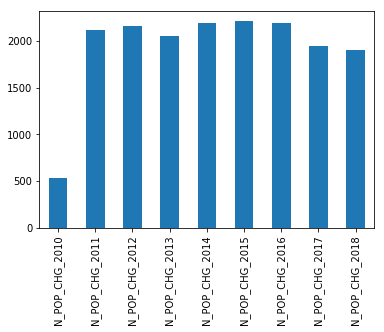

In [10]:
pop_est.filter(regex='N_POP_CHG_').mean().plot.bar()
plt.show()

In [11]:
# drop columns from 2010
pop_est.drop(['ESTIMATES_BASE_2010','N_POP_CHG_2010','Births_2010','Deaths_2010','INTERNATIONAL_MIG_2010',
              'DOMESTIC_MIG_2010', 'NET_MIG_2010'], axis=1, inplace=True)

To simplify our analysis, instead of using `N_POP_CHG_` for each year as a separate feature, we will create a new feature `AVE_POP_CHG` as the average of values from 2011 to 2018. The same processing is applied to other columns such as `Births_`, `Deaths_`, etc.

In [12]:
# new column names for the average values
ave_cols = ['AVE_POP_CHG', 'AVE_BIRTHS', 'AVE_DEATHS', 'AVE_INTERNATIONAL_MIG', 'AVE_DOMESTIC_MIG', 
            'AVE_NET_MIG', 'AVE_POP_ESTIMATE']
# old column names regular expressions
old_cols_regex = ['N_POP_CHG_', 'Births_20', 'Deaths_20', 'INTERNATIONAL_MIG_20', 'DOMESTIC_MIG_20',
                 'NET_MIG_20', 'POP_ESTIMATE_20']
for i in range(len(ave_cols)):
    pop_est[ave_cols[i]] = pop_est.filter(regex=old_cols_regex[i]).apply(lambda x: np.mean(x[:]), axis=1)
    pop_est.drop(list(pop_est.filter(regex=old_cols_regex[i])), axis=1, inplace=True)

In [13]:
pop_est.head()

,FIPS,State,Area_Name,CENSUS_2010_POP,FIPS_int,AVE_POP_CHG,AVE_BIRTHS,AVE_DEATHS,AVE_INTERNATIONAL_MIG,AVE_DOMESTIC_MIG,AVE_NET_MIG,AVE_POP_ESTIMATE
0,00000,US,United States,308745538,0,2230168.625,3940843.000,2650116.250,939441.875,0.000,939441.875,3.183726e+08
1,01000,AL,Alabama,4779736,1000,12802.875,58762.750,50957.625,4577.875,494.875,5072.750,4.839298e+06
2,01001,AL,Autauga County,54571,1001,105.875,637.000,550.500,4.000,16.875,20.875,5.506789e+04
3,01003,AL,Baldwin County,182265,1003,4363.875,2218.875,2006.750,170.500,3934.375,4104.875,1.994686e+05
4,01005,AL,Barbour County,27457,1005,-306.125,282.875,306.375,4.750,-288.750,-284.000,2.641200e+04


There are 2 columns that are quite similar `CENSUS_2010_POP` and `AVE_POP_ESTIMATE`. The `AVE_POP_ESTIMATE` was calculated as the average between the annual census, whereas the `CENSUS_2010_POP` is the result from the official nationwide *decennial* census. Therefore, we will drop our `AVE_POP_ESTIMATE` under assumption that the `CENSUS_2010_POP` is more accurate.

The column `AVE_NET_MIG` is the sum between 2 columns `AVE_INTERNATIONAL_MIG` and `AVE_DOMESTIC_MIG`, so we will drop `AVE_NET_MIG`.

In [14]:
pop_est.drop(['AVE_POP_ESTIMATE', 'AVE_NET_MIG'], axis=1, inplace=True)

What we notice next is that apart from county data, we also have aggregate data for the whole country `Area_Name` is `United States` or for the whole state such as `Alabama`. Since we wish to do analysis on counties, we will drop these aggregate rows. 

The `FIPS` for the United States is `00000`. For each state, the `FIPS` is divisible by 1000, e.g. Alabama is `01000`.

In [15]:
pop_est = pop_est[pop_est['FIPS_int'] > 0] # drop US
pop_state = pop_est[pop_est['FIPS_int'] % 1000 == 0].reset_index(drop=True).rename(columns={'Area_Name':'State_Name'})
pop_county = pop_est[pop_est['FIPS_int'] % 1000 > 0].reset_index(drop=True).rename(columns={'Area_Name':'County_Name'})
pop_county.head()

,FIPS,State,County_Name,CENSUS_2010_POP,FIPS_int,AVE_POP_CHG,AVE_BIRTHS,AVE_DEATHS,AVE_INTERNATIONAL_MIG,AVE_DOMESTIC_MIG
0,01001,AL,Autauga County,54571,1001,105.875,637.000,550.500,4.000,16.875
1,01003,AL,Baldwin County,182265,1003,4363.875,2218.875,2006.750,170.500,3934.375
2,01005,AL,Barbour County,27457,1005,-306.125,282.875,306.375,4.750,-288.750
3,01007,AL,Bibb County,22915,1007,-59.000,258.625,253.250,13.875,-77.250
4,01009,AL,Blount County,57322,1009,58.375,684.750,623.375,19.500,-16.875


In [16]:
# to keep a record of each state's and each county's FIPS
FIPS_state = pop_state[['FIPS','FIPS_int','State','State_Name']]
FIPS_county = pop_county[['FIPS','FIPS_int','State','County_Name']]
FIPS_state.head()

,FIPS,FIPS_int,State,State_Name
0,01000,1000,AL,Alabama
1,02000,2000,AK,Alaska
2,04000,4000,AZ,Arizona
3,05000,5000,AR,Arkansas
4,06000,6000,CA,California


<a id='poverty'></a>

# Poverty estimates

The second sheet in the excel file includes variable description for the dataset. `POV` stands for 'poverty'. Variables with code `017` represents poverty rates in children aged 0-17 years. Since children 0-4 years (`04`) and 5-17 years (`517`) are already included in the children column, we will drop these columns.

In [17]:
poverty_est = pd.read_excel('../Data/census/County_PovertyEstimates.xls', header=4, dtype={'FIPStxt':str})
# rename columns
poverty_est.rename(columns={'FIPStxt':'FIPS', 'Stabr': 'State', 'POVALL_2018': 'ABS_POVERTY',
                            'PCTPOVALL_2018': 'PERCENT_POVERTY', 'POV017_2018': 'ABS_POVERTY_CHILDREN', 
                            'PCTPOV017_2018': 'PERCENT_POVERTY_CHILDREN', 'MEDHHINC_2018': 'MEDIAN_HH_INCOME'}, inplace=True)
poverty_est['FIPS_int'] = [int(fips) for fips in poverty_est['FIPS'].values.tolist()]
poverty_est.drop(list(poverty_est.filter(regex='517')), axis=1, inplace=True)
poverty_est.drop(list(poverty_est.filter(regex='04')), axis=1, inplace=True)

In [18]:
poverty_est.head()

,FIPS,State,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,ABS_POVERTY,CI90LBAll_2018,CI90UBALL_2018,...,ABS_POVERTY_CHILDREN,CI90LB017_2018,CI90UB017_2018,PERCENT_POVERTY_CHILDREN,CI90LB017P_2018,CI90UB017P_2018,MEDIAN_HH_INCOME,CI90LBINC_2018,CI90UBINC_2018,FIPS_int
0,00000,US,United States,NaN,NaN,NaN,NaN,41852315,41619366,42085264,...,12997532,12873127,13121937,18.0,17.8,18.2,61937,61843,62031,0
1,01000,AL,Alabama,NaN,NaN,NaN,NaN,801758,785668,817848,...,255613,247744,263482,23.9,23.2,24.6,49881,49123,50639,1000
2,01001,AL,Autauga County,2.0,2.0,2.0,2.0,7587,6334,8840,...,2509,1965,3053,19.3,15.1,23.5,59338,53628,65048,1001
3,01003,AL,Baldwin County,4.0,5.0,3.0,2.0,21069,17390,24748,...,6442,4723,8161,13.9,10.2,17.6,57588,54437,60739,1003
4,01005,AL,Barbour County,6.0,6.0,6.0,6.0,6788,5662,7914,...,2242,1788,2696,43.9,35.0,52.8,34382,31157,37607,1005


Columns to drop include `Code` columns and derived data such as `CI90` (90% confidence interval)

In [19]:
poverty_est.drop(list(poverty_est.filter(regex='Code')), axis=1, inplace=True)
poverty_est.drop(list(poverty_est.filter(regex='CI90')), axis=1, inplace=True)

In [20]:
# similar to above, we will also drop whole country and whole state aggregate rows based on FIPS
poverty_est = poverty_est[poverty_est['FIPS_int'] > 0] # drop US
poverty_county = poverty_est[poverty_est['FIPS_int'] % 1000 > 0].reset_index(drop=True).rename(columns={'Area_name':'County_Name'})
poverty_county.head()

,FIPS,State,County_Name,ABS_POVERTY,PERCENT_POVERTY,ABS_POVERTY_CHILDREN,PERCENT_POVERTY_CHILDREN,MEDIAN_HH_INCOME,FIPS_int
0,01001,AL,Autauga County,7587,13.8,2509,19.3,59338,1001
1,01003,AL,Baldwin County,21069,9.8,6442,13.9,57588,1003
2,01005,AL,Barbour County,6788,30.9,2242,43.9,34382,1005
3,01007,AL,Bibb County,4400,21.8,1238,27.8,46064,1007
4,01009,AL,Blount County,7527,13.2,2374,18.0,50412,1009


<a id='unemployment'></a>

## Unemployment rates

In [21]:
unemployment_est = pd.read_excel('../Data/census/County_Unemployment.xls', header=4, dtype={'FIPS':str})
unemployment_est.insert(1, 'FIPS_int', [int(i) for i in unemployment_est['FIPS'].values.tolist()])
unemployment_est.rename(columns={'Metro_2013': 'Metropolitan', 'Median_Household_Income_2018': 'Med_HH_Income', 
                                 'Med_HH_Income_Percent_of_State_Total_2018': 'Median_HH_Income_pct_state'}, inplace=True)

In [22]:
unemployment_est.head()

,FIPS,FIPS_int,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metropolitan,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Med_HH_Income,Median_HH_Income_pct_state
0,00000,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,...,160273906.0,153293830.0,6980076.0,4.36,161640488.0,155344043.0,6296445.0,3.9,61937.0,NaN
1,01000,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,...,2178243.0,2081676.0,96567.0,4.40,2198837.0,2112347.0,86490.0,3.9,49881.0,100.0000
2,01001,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,...,25972.0,24958.0,1014.0,3.90,25957.0,25015.0,942.0,3.6,59338.0,118.9591
3,01003,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,...,92090.0,88342.0,3748.0,4.10,93849.0,90456.0,3393.0,3.6,57588.0,115.4508
4,01005,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,...,8317.0,7831.0,486.0,5.80,8373.0,7940.0,433.0,5.2,34382.0,68.9280


Columns to drop include `Code` and `Civilian_labor_force_` columns. The `Employed_` and `Unemployed_` columns provide raw number of population employed or unemployed, but we are interested in the *rates* instead, so these columns are dropped too. 

We will add a column `Ave_Unemployed_Rate` as the average unemployment rates between 2007 to 2018. `Metropolitan` column is converted to a binary variable, with `1` as an urban setting and `0` as a rural setting.

In [23]:
unemployment_est.drop(list(unemployment_est.filter(regex='code')), axis=1, inplace=True)
unemployment_est.drop(list(unemployment_est.filter(regex='Civilian_labor_force_')), axis=1, inplace=True)
unemployment_est.drop(list(unemployment_est.filter(regex='Employed_20')), axis=1, inplace=True)
unemployment_est.drop(list(unemployment_est.filter(regex='Unemployed_20')), axis=1, inplace=True)

unemployment_est['Ave_Unemployed_Rate'] = unemployment_est.filter(regex='Unemployment_rate').apply(lambda x: np.mean(x[:]), axis=1)
unemployment_est.drop(list(unemployment_est.filter(regex='Unemployment_rate')), axis=1, inplace=True)

unemployment_est['Metropolitan'] = unemployment_est.apply(lambda x: 1 if x['Metropolitan']>0 else 0, axis=1)

Similar to above, aggregate rows for the United States and each state are dropped based on the `FIPS` value.

In [24]:
unemployment_est = unemployment_est[unemployment_est['FIPS_int'] > 0] # drop US
unemployment_county = unemployment_est[unemployment_est['FIPS_int'] % 1000 > 0].reset_index(drop=True).rename(columns={'Area_name':'County_Name'})
unemployment_county.head()

,FIPS,FIPS_int,State,County_Name,Metropolitan,Med_HH_Income,Median_HH_Income_pct_state,Ave_Unemployed_Rate
0,01001,1001,AL,"Autauga County, AL",1,59338.0,118.9591,6.008333
1,01003,1003,AL,"Baldwin County, AL",1,57588.0,115.4508,6.266667
2,01005,1005,AL,"Barbour County, AL",0,34382.0,68.9280,9.466667
3,01007,1007,AL,"Bibb County, AL",1,46064.0,92.3478,7.508333
4,01009,1009,AL,"Blount County, AL",1,50412.0,101.0645,6.166667


<a id='education'></a>

## Education level

In [25]:
education_est = pd.read_excel('../Data/census/County_Education.xls', header=4, dtype={'FIPS Code':str})
# simplify column names, with LT = 'less than', GT = 'greater than'
education_est.rename(columns={'FIPS Code': 'FIPS', 'Less than a high school diploma, 2014-18': 'LT_HighSchool',
                              'High school diploma only, 2014-18': 'HighSchool', 
                              'Some college or associates degree, 2014-18': 'Associate', 
                              'Bachelors degree or higher, 2014-18': 'Bachelor_GT', 
                              'Percent of adults with less than a high school diploma, 2014-18': 'Percent_LT_HighSchool',
                              'Percent of adults with a high school diploma only, 2014-18': 'Percent_HighSchool', 
                              'Percent of adults completing some college or associates degree, 2014-18': 'Percent_Associate',
                              'Percent of adults with a bachelors degree or higher, 2014-18': 'Percent_Bachelor_GT'}, inplace=True)
education_est['FIPS_int'] = [int(fips) for fips in education_est['FIPS'].values.tolist()]

In [26]:
education_est.head()

,FIPS,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults with a bachelor's degree or higher, 2000",LT_HighSchool,HighSchool,Associate,Bachelor_GT,Percent_LT_HighSchool,Percent_HighSchool,Percent_Associate,Percent_Bachelor_GT,FIPS_int
0,00000,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,24.4,26948057.0,59265308.0,63365655.0,68867051.0,12.3,27.1,29.0,31.5,0
1,01000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,19.0,470043.0,1020172.0,987148.0,822595.0,14.2,30.9,29.9,24.9,1000
2,01001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,18.0,4204.0,12119.0,10552.0,10291.0,11.3,32.6,28.4,27.7,1001
3,01003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,23.1,14310.0,40579.0,46025.0,46075.0,9.7,27.6,31.3,31.3,1003
4,01005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,10.9,4901.0,6486.0,4566.0,2220.0,27.0,35.7,25.1,12.2,1005


Columns to drop include `Code` and data from the census of 1970, 1980, 1990 and 2000.

In [27]:
education_est.drop(list(education_est.filter(regex='Code')), axis=1, inplace=True)
education_est.drop(list(education_est.filter(regex='1970')), axis=1, inplace=True)
education_est.drop(list(education_est.filter(regex='1980')), axis=1, inplace=True)
education_est.drop(list(education_est.filter(regex='1990')), axis=1, inplace=True)
education_est.drop(list(education_est.filter(regex='2000')), axis=1, inplace=True)

In [28]:
# drop United States and whole states data
education_est = education_est[education_est['FIPS_int'] > 0] # drop US
education_county = education_est[education_est['FIPS_int'] % 1000 > 0].reset_index(drop=True).rename(columns={'Area name':'County_Name'})
education_county.head()

,FIPS,State,County_Name,LT_HighSchool,HighSchool,Associate,Bachelor_GT,Percent_LT_HighSchool,Percent_HighSchool,Percent_Associate,Percent_Bachelor_GT,FIPS_int
0,01001,AL,Autauga County,4204.0,12119.0,10552.0,10291.0,11.3,32.6,28.4,27.7,1001
1,01003,AL,Baldwin County,14310.0,40579.0,46025.0,46075.0,9.7,27.6,31.3,31.3,1003
2,01005,AL,Barbour County,4901.0,6486.0,4566.0,2220.0,27.0,35.7,25.1,12.2,1005
3,01007,AL,Bibb County,2650.0,7471.0,3846.0,1813.0,16.8,47.3,24.4,11.5,1007
4,01009,AL,Blount County,7861.0,13489.0,13267.0,5010.0,19.8,34.0,33.5,12.6,1009


<a id='heart_disease'></a>

## Heart disease mortality rates

The heart disease dataset includes mortality data, which have been preprocessed and stratified by `Stratification1` which is gender and `Stratification2` which is race/ethnicity. Since we all interested in the countywide mortality rates, we will only consider rows with stratifications of `Overall`. Data values are mortality counts per 100,000 people.

In [29]:
heart_mortality = pd.read_csv('../Data/census/County_HeartDiseaseMortality.csv', header=0)
heart_mortality = heart_mortality[(heart_mortality['Stratification1']=='Overall') & (heart_mortality['Stratification2']=='Overall')]
heart_mortality.drop(['Year', 'Class','DataSource','Topic','StratificationCategory1','StratificationCategory2',
                      'Stratification1','Stratification2','TopicID','Data_Value_Unit','Data_Value_Type',
                      'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Location 1'], axis=1, inplace=True)
heart_mortality.rename(columns={'LocationAbbr': 'State', 'LocationDesc': 'County_Name', 
                                'LocationID': 'FIPS_int', 'Data_Value':'Mortality_per_100k'}, inplace=True)
heart_mortality.dropna(inplace=True)

In [30]:
heart_mortality.head()

,State,County_Name,GeographicLevel,Mortality_per_100k,FIPS_int
0,AK,Aleutians East,County,105.3,2013
1,AK,Aleutians West,County,211.9,2016
2,AK,Anchorage,County,257.9,2020
3,AK,Bethel,County,351.6,2050
5,AK,Denali,County,305.5,2068


`GeographicLevel` identified rows that are aggregate of the whole country or whole state. These rows are dropped.

In [31]:
heart_mortality_county = heart_mortality[heart_mortality['GeographicLevel'] == 'County']
heart_mortality_county = heart_mortality_county.drop(['GeographicLevel'],axis=1).reset_index(drop=True)
heart_mortality_county.head()

,State,County_Name,Mortality_per_100k,FIPS_int
0,AK,Aleutians East,105.3,2013
1,AK,Aleutians West,211.9,2016
2,AK,Anchorage,257.9,2020
3,AK,Bethel,351.6,2050
4,AK,Denali,305.5,2068


<a id='stroke'></a>

## Stroke mortality rates

Stroke mortality dataset is similar to the previous heart disease dataset. We will only consider rows of `Stratification1` and `Stratification2` as `Overall`.

In [32]:
stroke_mortality = pd.read_csv('../Data/census/County_StrokeMortality.csv', header=0)
stroke_mortality = stroke_mortality[(stroke_mortality['Stratification1']=='Overall') & (stroke_mortality['Stratification2']=='Overall')]
stroke_mortality.drop(['Year', 'Class','DataSource','Topic','StratificationCategory1','StratificationCategory2',
                       'Stratification1','Stratification2','TopicID','Data_Value_Unit','Data_Value_Type',
                       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Location 1'], axis=1, inplace=True)
stroke_mortality.rename(columns={'LocationAbbr': 'State', 'LocationDesc': 'County_Name', 'LocationID': 'FIPS_int', 'Data_Value':'Mortality_per_100k'}, inplace=True)
stroke_mortality.dropna(inplace=True)

In [33]:
stroke_mortality.head()

,State,County_Name,GeographicLevel,Mortality_per_100k,FIPS_int
2,AK,Anchorage,County,70.7,2020
3,AK,Bethel,County,95.0,2050
5,AK,Denali,County,77.2,2068
6,AK,Dillingham,County,113.0,2070
7,AK,Fairbanks North Star,County,77.5,2090


In [34]:
# drop US and state rows
stroke_mortality_county = stroke_mortality[stroke_mortality['GeographicLevel'] == 'County']
stroke_mortality_county = stroke_mortality_county.drop(['GeographicLevel'],axis=1).reset_index(drop=True)
stroke_mortality_county.head()

,State,County_Name,Mortality_per_100k,FIPS_int
0,AK,Anchorage,70.7,2020
1,AK,Bethel,95.0,2050
2,AK,Denali,77.2,2068
3,AK,Dillingham,113.0,2070
4,AK,Fairbanks North Star,77.5,2090


<a id='teen_birth'></a>

## Teen birth rates

In [35]:
teen_birth = pd.read_csv('../Data/census/County_TeenBirthRate.csv', header=0)
# drop confidence limits
teen_birth.drop(['State FIPS Code', 'County FIPS Code', 'Lower Confidence Limit', 'Upper Confidence Limit'], axis=1, inplace=True)
teen_birth.rename(columns={'County':'County_Name', 'State':'State_Name', 'Combined FIPS Code':'FIPS_int', 'Birth Rate':'Birth_Rate'}, inplace=True)

In [36]:
teen_birth.head()

,Year,State_Name,County_Name,FIPS_int,Birth_Rate
0,2003,Alabama,Autauga,1001,48.4
1,2004,Alabama,Autauga,1001,46.4
2,2005,Alabama,Autauga,1001,44.1
3,2006,Alabama,Autauga,1001,44.3
4,2007,Alabama,Autauga,1001,43.7


In [37]:
teen_birth['Year'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018])

The teen birth dataset ranges from 2003 to 2018, each row shows teen birth rate from a county in a specific year. To simplify our analysis, we will look at the average teen birth rate over these years. First we can use `pd.pivot_table` to look at the birth rates at each year before averaging.

In [38]:
teen_birth = pd.pivot_table(teen_birth, values='Birth_Rate', index=['State_Name','County_Name','FIPS_int'], columns='Year').reset_index()
teen_birth.head()

Year,State_Name,County_Name,FIPS_int,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,Autauga,1001,48.4,46.4,44.1,44.3,43.7,41.7,38.8,34.8,32.0,30.4,27.9,26.0,24.6,23.1,22.0,20.9
1,Alabama,Baldwin,1003,47.3,47.6,47.6,50.0,50.9,49.4,46.2,41.2,37.5,35.2,31.9,29.5,27.6,25.6,24.1,22.7
2,Alabama,Barbour,1005,69.8,70.9,71.4,75.5,77.4,75.8,71.7,64.8,59.3,55.3,49.3,44.6,40.5,36.6,33.6,30.8
3,Alabama,Bibb,1007,51.2,51.0,50.6,53.1,54.7,54.5,53.0,49.7,47.5,46.5,43.6,41.2,39.0,36.5,34.6,32.7
4,Alabama,Blount,1009,51.1,50.2,49.0,50.8,51.8,51.1,49.3,45.7,43.0,41.3,38.1,35.5,33.2,30.6,28.7,26.9


In [39]:
# calculate average birth rate and drop the year columns
teen_birth['AVE_BIRTH_RATE'] = teen_birth.filter(regex='20').apply(lambda x: np.mean(x[:]), axis=1)
teen_birth.drop(list(teen_birth.filter(regex='20')), axis=1, inplace=True)
teen_birth.head()

Year,State_Name,County_Name,FIPS_int,AVE_BIRTH_RATE
0,Alabama,Autauga,1001,34.31875
1,Alabama,Baldwin,1003,38.39375
2,Alabama,Barbour,1005,57.95625
3,Alabama,Bibb,1007,46.21250
4,Alabama,Blount,1009,42.26875


<a id='internet'></a>

## High-speed Internet availability

High-speed Internet dataset includes columns `consumer` for the number of consumers, `non_consumer` for number of non-consumers, and `hhs` for number of households. We are not interneted in these columns, so they are dropped.

We are only interested in the percentage of households with high-speed Internet in the county, which is `ratio`.

In [40]:
internet = pd.read_excel('../Data/census/County_HighSpeedInternet.xlsx', sheet_name=0, header=0)
internet.drop(['consumer','non_consumer','all','hhs'], axis=1, inplace=True)
internet.rename(columns={'countycode':'FIPS_int', 'statename':'State_Name', 'countyname':'County_Name', 
                         'ratio':'Percent_High_Speed'}, inplace=True)
internet.dropna(inplace=True)

In [41]:
internet.head()

,FIPS_int,State_Name,County_Name,Percent_High_Speed
0,1001,Alabama,Autauga County,0.75
1,1003,Alabama,Baldwin County,0.92
2,1005,Alabama,Barbour County,0.54
3,1007,Alabama,Bibb County,-9999.00
4,1009,Alabama,Blount County,0.62


In [42]:
# this dataset designate nan values as -9999, so we remove these rows
internet = internet[internet['Percent_High_Speed']>-1].reset_index(drop=True)

<a id='brfss'></a>

## Behavioral Risk Factor Surveillance System (BRFSS)

The BRFSS dataset is very large and complex. Firstly, let's remove columns that are not relevant such as `Confidence_limit` and `Display_order`, etc.

In [43]:
brfss = pd.read_csv('../Data/census/County_BRFSS_categorical.csv', header=0)
brfss.drop(['Sample_Size','Confidence_limit_Low','Confidence_limit_High','Display_order',
            'Data_value_unit','Data_value_type','Data_Value_Footnote_Symbol','Data_Value_Footnote',
            'DataSource','ClassId','TopicId','LocationID','RESPID','GeoLocation','Class'],axis=1, inplace=True)

In [44]:
brfss.head()

,Year,Locationabbr,Locationdesc,Topic,Question,Response,Data_value,QuestionID
0,2008,PA,PA - Delaware County,Overall Health,How is your general health?,Excellent,21.0,GENHLTH
1,2008,OH,OH - Cuyahoga County,Overall Health,How is your general health?,Very good,33.5,GENHLTH
2,2007,NJ,NJ - Union County,Fair or Poor Health,Health Status (variable calculated from one or...,Fair or Poor Health,18.7,_RFHLTH
3,2009,MD,MD - Baltimore County,Cardiovascular Disease,Ever told you had a heart attack (myocardial i...,No,96.1,CVDINFR4
4,2002,CT,CT - Tolland County,PSA Test,Men aged 40+ who have had a PSA test within th...,No,NaN,_RFPSA2Y


Each row `Data_value` reports the percentage of a particular *multiple-choice* `Response` to a particular `Question`. Each `Question` has a unique identifier `QuestionID` and belongs to a group of `Topic`. Each row records the time (`Year`) and location (`Locationabbr` and `Locationdesc`) that this question survey was conducted.

For the example below, the `Topic` of `Overall Health` includes only 1 question `How is your general health?`, with the corresponding `QuestionID` of `GENHLTH`. The response categories include `Excellent`, `Very good`, `Fair`, `Good`, and `Poor`. For a particular location, the percentage of response adds up too 100%. 

In [45]:
print(brfss[brfss['Topic']=='Overall Health']['Question'].unique())
print(brfss[brfss['Topic']=='Overall Health']['Response'].unique())
print(brfss[(brfss['Topic']=='Overall Health') & (brfss['Year']==2008) & (brfss['Locationdesc']=='PA - Delaware County')][['Locationdesc','Response','Data_value']])

['How is your general health?']
['Excellent' 'Very good' 'Fair' 'Good' 'Poor']
                Locationdesc   Response  Data_value
0       PA - Delaware County  Excellent        21.0
3170    PA - Delaware County       Fair        13.1
80075   PA - Delaware County  Very good        33.9
102749  PA - Delaware County       Poor         3.8
120121  PA - Delaware County       Good        28.2


In [46]:
# Here are the counties that are included
brfss_county = brfss[['Locationabbr','Locationdesc']].drop_duplicates(['Locationdesc'])
brfss_county.head()

,Locationabbr,Locationdesc
0,PA,PA - Delaware County
1,OH,OH - Cuyahoga County
2,NJ,NJ - Union County
3,MD,MD - Baltimore County
4,CT,CT - Tolland County


In [47]:
print(brfss['QuestionID'].unique().shape)
print(brfss[['QuestionID','Question']].drop_duplicates())

(59,)
    QuestionID                                           Question
0      GENHLTH                        How is your general health?
2      _RFHLTH  Health Status (variable calculated from one or...
3     CVDINFR4  Ever told you had a heart attack (myocardial i...
4     _RFPSA2Y  Men aged 40+ who have had a PSA test within th...
6     _RFHYPE5  Adults who have been told they have high blood...
7     _RFPAP32  Women aged 18+ who have had a pap test within ...
8     _CHOLCHK  Adults who have had their blood cholesterol ch...
9     USEEQUIP  Adults with health problem(s) that requires th...
10    _ALTETH2  Adults aged 65+ who have had all their natural...
11    BLOODCHO  Adults who have ever had their blood cholester...
12    HLTHPLAN      Do you have any kind of health care coverage?
13     _HCVU65  Adults aged 18-64 who have any kind of health ...
14    DIABETE2  Have you ever been told by a doctor that you h...
16    _SMOKER2  Four Level Smoking Status (variable calculated...
17  

There are **59** unique questions in this BRFSS dataset. After looking over all questions, I have decided to retain these **16** questions that are more general than granular to indicate behavioral health status of the county population.

1. Health status `_RFHLTH`
2. Heart attack `CVDINFR4`
3. Stroke `CVDSTRK3`
4. Heart disease `CVDCRHD3`
5. High blood pressure `_RFHYPE4`
6. Blood cholesterol check `_CHOLCHK`
7. Health care coverage `HLTHPLAN`
8. Current smokers `_RFSMOK3`
9. Disability `QLACTLM2`
10. Flu shot `_FLSHOT3`
11. Body Mass Index (BMI) `_BMI4CAT`
12. Dental visit `_DENTVST`
13. Binge drinkers `_RFBING4`
14. Asthma `_LTASTHM`
15. Diabetes `DIABETE2`
16. Exercise `_RFPAVIG`

Notice that some `QuestionID` have an underscore at the front, while some do not. This BRFSS has actually been pre-processed by the Census Bureau previously. The underscore identifies variables which have been calculated from one or more BRFSS questions. The non-underscore variables are raw data values from the BRFSS survey.

**1. Health status** `_RFHLTH`

We will create a `subset` dataframe that only includes rows with `QuestionID = _RFHLTH`. We will use `pd.pivot_table` to create 2 columns `Fair or Poor Health` or `Good or Better Health`. Note that these two columns add up to 100%.

In [48]:
subset = brfss[brfss['QuestionID']=='_RFHLTH']
subset = pd.pivot_table(subset, values='Data_value', index=['Year','Locationabbr','Locationdesc','Topic','Question','QuestionID'],columns='Response').reset_index()
subset.head()

Response,Year,Locationabbr,Locationdesc,Topic,Question,QuestionID,Fair or Poor Health,Good or Better Health
0,2003,AK,AK - Anchorage Municipality,Fair or Poor Health,Health Status (variable calculated from one or...,_RFHLTH,11.0,89.0
1,2003,AK,AK - Fairbanks North Star Borough,Fair or Poor Health,Health Status (variable calculated from one or...,_RFHLTH,8.4,91.6
2,2003,AL,AL - Jefferson County,Fair or Poor Health,Health Status (variable calculated from one or...,_RFHLTH,16.4,83.6
3,2003,AR,AR - Pulaski County,Fair or Poor Health,Health Status (variable calculated from one or...,_RFHLTH,12.8,87.2
4,2003,AZ,AZ - Maricopa County,Fair or Poor Health,Health Status (variable calculated from one or...,_RFHLTH,15.5,84.5


Since the `Fair or Poor Health` and `Good or Better Health` columns add up to 100%, we only need one of them. We will keep `Good or Better Health` as our data value and drop all unnecessary columns. 

We notice that each row is still attached to the year the survey was conducted, so we can again use `pd.pivot_table` to create columns for each `Year` for each location. Afterward, we can calculate the average between 2003 and 2010 to create a new column `Percent_Good_Health`.

In [49]:
subset.drop(['Locationabbr','Topic','Question','Fair or Poor Health','QuestionID'], axis=1, inplace=True)
subset = pd.pivot_table(subset, values='Good or Better Health', index=['Locationdesc'], columns='Year').reset_index()
subset.head()

Year,Locationdesc,2003,2004,2005,2006,2007,2008,2009,2010
0,AK - Anchorage Municipality,89.0,90.5,89.4,NaN,87.3,86.8,91.5,NaN
1,AK - Fairbanks North Star Borough,91.6,88.6,87.1,NaN,NaN,88.6,NaN,NaN
2,AL - Jefferson County,83.6,83.2,83.4,82.3,81.1,85.2,83.1,82.0
3,AL - Mobile County,NaN,NaN,NaN,NaN,71.9,77.6,79.9,78.1
4,AL - Montgomery County,NaN,NaN,NaN,NaN,80.9,79.2,NaN,NaN


In [50]:
subset['Percent_Good_Health'] = subset.filter(regex='20').apply(lambda x: np.mean(x[:]), axis=1)
subset.drop(list(subset.filter(regex='20')), axis=1, inplace=True)
subset.head()

Year,Locationdesc,Percent_Good_Health
0,AK - Anchorage Municipality,89.083333
1,AK - Fairbanks North Star Borough,88.975000
2,AL - Jefferson County,82.987500
3,AL - Mobile County,76.875000
4,AL - Montgomery County,80.050000


Now that we have processed the `subset` for this `Question`, we need to merge this data back into our main dataset, making sure we line up the `Locationdesc` when using `pd.merge`.

In [51]:
brfss_county = brfss_county.merge(subset, how='left', on='Locationdesc')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health
0,PA,PA - Delaware County,85.425000
1,OH,OH - Cuyahoga County,84.237500
2,NJ,NJ - Union County,82.712500
3,MD,MD - Baltimore County,85.812500
4,CT,CT - Tolland County,90.557143


**2. Heart attack** `CVDINFR4`

Similar to above, we will create a subset of `QuestionID = CVDINFR4` and pivot the responses into columns. The response columns are simply a `Yes` or `No`, adding up to 100%.

In [52]:
subset = brfss[brfss['QuestionID']=='CVDINFR4']
subset = pd.pivot_table(subset, values='Data_value', index=['Year','Locationabbr','Locationdesc','Topic','Question','QuestionID'],columns='Response').reset_index()
subset.head()

Response,Year,Locationabbr,Locationdesc,Topic,Question,QuestionID,No,Yes
0,2007,AK,AK - Anchorage Municipality,Cardiovascular Disease,Ever told you had a heart attack (myocardial i...,CVDINFR4,97.6,2.4
1,2007,AL,AL - Jefferson County,Cardiovascular Disease,Ever told you had a heart attack (myocardial i...,CVDINFR4,95.7,4.3
2,2007,AL,AL - Mobile County,Cardiovascular Disease,Ever told you had a heart attack (myocardial i...,CVDINFR4,93.9,6.1
3,2007,AL,AL - Montgomery County,Cardiovascular Disease,Ever told you had a heart attack (myocardial i...,CVDINFR4,96.6,3.4
4,2007,AL,AL - Tuscaloosa County,Cardiovascular Disease,Ever told you had a heart attack (myocardial i...,CVDINFR4,98.0,2.0


Since the `Yes` and `No` columns add up to 100%, we will remove the `No` column with other unnecessary columns. We then pivot the `Year` onto the columns then average the values to calculate `Percent_Ever_Had_Heart_Attack`.

In [53]:
subset.drop(['Locationabbr','Topic','Question','No','QuestionID'], axis=1, inplace=True)
subset = pd.pivot_table(subset, values='Yes', index=['Locationdesc'], columns='Year').reset_index()
subset.head()

Year,Locationdesc,2007,2008,2009,2010
0,AK - Anchorage Municipality,2.4,2.7,3.0,NaN
1,AK - Fairbanks North Star Borough,NaN,4.2,NaN,NaN
2,AL - Jefferson County,4.3,5.9,4.1,5.3
3,AL - Mobile County,6.1,5.6,4.7,4.8
4,AL - Montgomery County,3.4,6.9,NaN,NaN


In [54]:
subset['Percent_Ever_Had_Heart_Attack'] = subset.filter(regex='20').apply(lambda x: np.mean(x[:]), axis=1)
subset.drop(list(subset.filter(regex='20')), axis=1, inplace=True)
subset.head()

Year,Locationdesc,Percent_Ever_Had_Heart_Attack
0,AK - Anchorage Municipality,2.70
1,AK - Fairbanks North Star Borough,4.20
2,AL - Jefferson County,4.90
3,AL - Mobile County,5.30
4,AL - Montgomery County,5.15


In [55]:
# left join into main brfss dataset
brfss_county = brfss_county.merge(subset, how='left', on='Locationdesc')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack
0,PA,PA - Delaware County,85.425000,3.966667
1,OH,OH - Cuyahoga County,84.237500,4.375000
2,NJ,NJ - Union County,82.712500,3.900000
3,MD,MD - Baltimore County,85.812500,4.525000
4,CT,CT - Tolland County,90.557143,3.675000


For the remaining questions, the process is similar. The most important part is deciding which column to keep in the main brfss dataset. I will simply paste the code without additional commentaries.

In [56]:
def clean_question(brfss_county, questionID, drop_cols, keep_response, ave_col):
    """Process each question
    
    Args: 
        brfss_county (pd.DataFrame): the main dataset to merge in
        questionID (str)
        drop_cols (list): columns to drop, e.g. if there are 'Yes' and 'No' columns that add up to 100%
                            then remove one of the two columns
        keep_response (str): column to keep, e.g. if there are 'Yes' and 'No' columns that add up to 100%
                            we remove a column with drop_cols, the remaining column is keep_response
        ave_col (str): new column name that provides the average over time range 2003-2018
        
    Returns:
        brfss_county (pd.DataFrame): after merging
    """
    drop_cols += ['Locationabbr','Topic','Question','QuestionID']
    subset = brfss[brfss['QuestionID']==questionID]
    subset = pd.pivot_table(subset, values='Data_value', index=['Year','Locationabbr','Locationdesc','Topic','Question','QuestionID'],columns='Response').reset_index()
    subset.drop(drop_cols, axis=1, inplace=True)
    subset = pd.pivot_table(subset, values=keep_response, index=['Locationdesc'], columns='Year').reset_index()
    subset[ave_col] = subset.filter(regex='20').apply(lambda x: np.mean(x[:]), axis=1)
    subset.drop(list(subset.filter(regex='20')), axis=1, inplace=True)
    brfss_county = brfss_county.merge(subset, how='left', on='Locationdesc')
    return brfss_county

**3. Stroke** `CVDSTRK3`

In [57]:
brfss_county = clean_question(brfss_county, 'CVDSTRK3', ['No'], 'Yes', 'Percent_Ever_Had_Stroke')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke
0,PA,PA - Delaware County,85.425000,3.966667,2.775000
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667
2,NJ,NJ - Union County,82.712500,3.900000,2.300000
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333
4,CT,CT - Tolland County,90.557143,3.675000,1.780000


**4. Heart disease** `CVDCRHD3`

In [58]:
brfss_county = clean_question(brfss_county, 'CVDCRHD3', ['No'], 'Yes', 'Percent_Ever_Had_Heart_Disease')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50


**5. High blood pressure** `_RFHYPE4`

In [59]:
brfss_county = clean_question(brfss_county, '_RFHYPE4', ['No'], 'Yes', 'Percent_High_BP')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3


**6. Blood cholesterol check** `_CHOLCHK`

In [60]:
brfss_county = clean_question(brfss_county, '_CHOLCHK', ['Never Checked','Not Checked in past 5 years'], 'Checked in past 5 years', 'Percent_Cholesterol_Checked')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667


**7. Health care coverage** `HLTHPLAN`

In [61]:
brfss_county = clean_question(brfss_county, 'HLTHPLAN', ['No'], 'Yes', 'Heathcare_Coverage')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000


**8. Current smokers** `_RFSMOK3`

In [62]:
brfss_county = clean_question(brfss_county, '_RFSMOK3', ['No'], 'Yes', 'Current_Smokers')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000


**9. Disability** `QLACTLM2`

In [63]:
brfss_county = clean_question(brfss_county, 'QLACTLM2', ['No'], 'Yes', 'Disability_Status')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers,Disability_Status
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000,18.225000
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667,19.866667
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000,15.083333
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333,19.800000
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000,16.240000


**10. Flu shot** `_FLSHOT3`

In [64]:
brfss_county = clean_question(brfss_county, '_FLSHOT3', ['No'], 'Yes', 'Flu_Shot')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers,Disability_Status,Flu_Shot
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000,18.225000,78.5
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667,19.866667,71.4
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000,15.083333,62.9
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333,19.800000,68.5
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000,16.240000,74.1


**11. Body Mass Index (BMI)** `_BMI4CAT`

In [65]:
brfss_county = clean_question(brfss_county, '_BMI4CAT', ['Neither overweight nor obese (BMI le 24.9)','Overweight (BMI 25.0-29.9)'], 'Obese (BMI 30.0 - 99.8)', 'Obesity')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers,Disability_Status,Flu_Shot,Obesity
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000,18.225000,78.5,25.825000
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667,19.866667,71.4,25.357143
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000,15.083333,62.9,21.628571
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333,19.800000,68.5,25.985714
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000,16.240000,74.1,20.150000


**12. Dentist visit** `_DENTVST`

In [66]:
brfss_county = clean_question(brfss_county, '_DENTVST', ['No'], 'Yes', 'Dentist_Visit')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers,Disability_Status,Flu_Shot,Obesity,Dentist_Visit
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000,18.225000,78.5,25.825000,72.70
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667,19.866667,71.4,25.357143,70.70
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000,15.083333,62.9,21.628571,73.20
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333,19.800000,68.5,25.985714,78.55
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000,16.240000,74.1,20.150000,82.70


**13. Binge drinking** `_RFBING4`

In [67]:
brfss_county = clean_question(brfss_county, '_RFBING4', ['No'], 'Yes', 'Binge_Drinkers')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers,Disability_Status,Flu_Shot,Obesity,Dentist_Visit,Binge_Drinkers
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000,18.225000,78.5,25.825000,72.70,20.466667
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667,19.866667,71.4,25.357143,70.70,16.280000
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000,15.083333,62.9,21.628571,73.20,14.420000
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333,19.800000,68.5,25.985714,78.55,14.100000
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000,16.240000,74.1,20.150000,82.70,14.760000


**14. Asthma** `_LTASTHM`

In [68]:
brfss_county = clean_question(brfss_county, '_LTASTHM', ['No'], 'Yes', 'Asthma')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers,Disability_Status,Flu_Shot,Obesity,Dentist_Visit,Binge_Drinkers,Asthma
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000,18.225000,78.5,25.825000,72.70,20.466667,13.960000
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667,19.866667,71.4,25.357143,70.70,16.280000,13.200000
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000,15.083333,62.9,21.628571,73.20,14.420000,11.511111
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333,19.800000,68.5,25.985714,78.55,14.100000,13.644444
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000,16.240000,74.1,20.150000,82.70,14.760000,14.662500


**15. Diabetes** `DIABETE2`

In [69]:
brfss_county = clean_question(brfss_county, 'DIABETE2', ['No'], 'Yes', 'Diabetes')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers,Disability_Status,Flu_Shot,Obesity,Dentist_Visit,Binge_Drinkers,Asthma,Diabetes
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000,18.225000,78.5,25.825000,72.70,20.466667,13.960000,7.875000
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667,19.866667,71.4,25.357143,70.70,16.280000,13.200000,8.942857
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000,15.083333,62.9,21.628571,73.20,14.420000,11.511111,8.214286
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333,19.800000,68.5,25.985714,78.55,14.100000,13.644444,8.228571
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000,16.240000,74.1,20.150000,82.70,14.760000,14.662500,6.083333


**16. Exercise** `_RFPAVIG`

In [70]:
brfss_county = clean_question(brfss_county, '_RFPAVIG', ['No'], 'Yes', 'Physical_Exercise')
brfss_county.head()

,Locationabbr,Locationdesc,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers,Disability_Status,Flu_Shot,Obesity,Dentist_Visit,Binge_Drinkers,Asthma,Diabetes,Physical_Exercise
0,PA,PA - Delaware County,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000,18.225000,78.5,25.825000,72.70,20.466667,13.960000,7.875000,27.566667
1,OH,OH - Cuyahoga County,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667,19.866667,71.4,25.357143,70.70,16.280000,13.200000,8.942857,26.050000
2,NJ,NJ - Union County,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000,15.083333,62.9,21.628571,73.20,14.420000,11.511111,8.214286,22.775000
3,MD,MD - Baltimore County,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333,19.800000,68.5,25.985714,78.55,14.100000,13.644444,8.228571,29.550000
4,CT,CT - Tolland County,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000,16.240000,74.1,20.150000,82.70,14.760000,14.662500,6.083333,34.766667


In [71]:
FIPS_county.head()

,FIPS,FIPS_int,State,County_Name
0,01001,1001,AL,Autauga County
1,01003,1003,AL,Baldwin County
2,01005,1005,AL,Barbour County
3,01007,1007,AL,Bibb County
4,01009,1009,AL,Blount County


The `brfss_county` dataset is almost ready; it has the `Locationabbr` and `Locationdesc` but we need the `FIPS` column to match with all the previous county datasets. Therefore, we have to merge with the `FIPS_county` dataset that we generated previously.

In [72]:
FIPS_county['Locationdesc'] = FIPS_county.apply(lambda x: x['State']+' - '+x['County_Name'], axis=1)
brfss_county = brfss_county.merge(FIPS_county, how='left', on='Locationdesc') 
brfss_county.drop(['State','Locationdesc'], axis=1, inplace=True)
brfss_county.rename(columns={'Locationabbr':'State_Name'}, inplace=True)
brfss_county.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State_Name,Percent_Good_Health,Percent_Ever_Had_Heart_Attack,Percent_Ever_Had_Stroke,Percent_Ever_Had_Heart_Disease,Percent_High_BP,Percent_Cholesterol_Checked,Heathcare_Coverage,Current_Smokers,Disability_Status,Flu_Shot,Obesity,Dentist_Visit,Binge_Drinkers,Asthma,Diabetes,Physical_Exercise,FIPS,FIPS_int,County_Name
0,PA,85.425000,3.966667,2.775000,4.70,NaN,83.400000,91.100000,21.050000,18.225000,78.5,25.825000,72.70,20.466667,13.960000,7.875000,27.566667,42045,42045.0,Delaware County
1,OH,84.237500,4.375000,2.866667,5.35,28.7,78.300000,88.312500,18.466667,19.866667,71.4,25.357143,70.70,16.280000,13.200000,8.942857,26.050000,39035,39035.0,Cuyahoga County
2,NJ,82.712500,3.900000,2.300000,4.15,25.2,79.725000,83.800000,15.900000,15.083333,62.9,21.628571,73.20,14.420000,11.511111,8.214286,22.775000,34039,34039.0,Union County
3,MD,85.812500,4.525000,2.883333,4.20,26.2,82.125000,90.355556,17.633333,19.800000,68.5,25.985714,78.55,14.100000,13.644444,8.228571,29.550000,24005,24005.0,Baltimore County
4,CT,90.557143,3.675000,1.780000,2.50,21.3,83.366667,92.200000,14.660000,16.240000,74.1,20.150000,82.70,14.760000,14.662500,6.083333,34.766667,09013,9013.0,Tolland County


<a id='combination'></a>

## Combining all datasets

We will now merge these datasets together into a large main dataset for analysis. Care must be taken to determine whether a *left*, *right* or *inner* join is best to preserve the robustness of the data.

We first start with `pop_county` and `poverty_county`.

In [73]:
pop_county.head()

,FIPS,State,County_Name,CENSUS_2010_POP,FIPS_int,AVE_POP_CHG,AVE_BIRTHS,AVE_DEATHS,AVE_INTERNATIONAL_MIG,AVE_DOMESTIC_MIG
0,01001,AL,Autauga County,54571,1001,105.875,637.000,550.500,4.000,16.875
1,01003,AL,Baldwin County,182265,1003,4363.875,2218.875,2006.750,170.500,3934.375
2,01005,AL,Barbour County,27457,1005,-306.125,282.875,306.375,4.750,-288.750
3,01007,AL,Bibb County,22915,1007,-59.000,258.625,253.250,13.875,-77.250
4,01009,AL,Blount County,57322,1009,58.375,684.750,623.375,19.500,-16.875


In [74]:
poverty_county.head()

,FIPS,State,County_Name,ABS_POVERTY,PERCENT_POVERTY,ABS_POVERTY_CHILDREN,PERCENT_POVERTY_CHILDREN,MEDIAN_HH_INCOME,FIPS_int
0,01001,AL,Autauga County,7587,13.8,2509,19.3,59338,1001
1,01003,AL,Baldwin County,21069,9.8,6442,13.9,57588,1003
2,01005,AL,Barbour County,6788,30.9,2242,43.9,34382,1005
3,01007,AL,Bibb County,4400,21.8,1238,27.8,46064,1007
4,01009,AL,Blount County,7527,13.2,2374,18.0,50412,1009


In [75]:
pop_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   3220 non-null   object 
 1   State                  3220 non-null   object 
 2   County_Name            3220 non-null   object 
 3   CENSUS_2010_POP        3220 non-null   int64  
 4   FIPS_int               3220 non-null   int64  
 5   AVE_POP_CHG            3142 non-null   float64
 6   AVE_BIRTHS             3142 non-null   float64
 7   AVE_DEATHS             3142 non-null   float64
 8   AVE_INTERNATIONAL_MIG  3142 non-null   float64
 9   AVE_DOMESTIC_MIG       3142 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 251.7+ KB


In [76]:
poverty_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      3141 non-null   object 
 1   State                     3141 non-null   object 
 2   County_Name               3141 non-null   object 
 3   ABS_POVERTY               3141 non-null   int64  
 4   PERCENT_POVERTY           3141 non-null   float64
 5   ABS_POVERTY_CHILDREN      3141 non-null   int64  
 6   PERCENT_POVERTY_CHILDREN  3141 non-null   float64
 7   MEDIAN_HH_INCOME          3141 non-null   int64  
 8   FIPS_int                  3141 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 221.0+ KB



Since both **`pop_county`** and **`poverty_county`** have similar number of non-null rows, we can perform an *inner* merge into the main dataset `data`.

In [77]:
data = pop_county.merge(right=poverty_county, how='inner', on='FIPS_int')
data.drop(columns=['FIPS_y','State_y','County_Name_y'], axis=1, inplace=True)
data.rename({'FIPS_x':'FIPS', 'State_x':'State', 'County_Name_x':'County_Name'}, axis=1, inplace=True)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      3141 non-null   object 
 1   State                     3141 non-null   object 
 2   County_Name               3141 non-null   object 
 3   CENSUS_2010_POP           3141 non-null   int64  
 4   FIPS_int                  3141 non-null   int64  
 5   AVE_POP_CHG               3141 non-null   float64
 6   AVE_BIRTHS                3141 non-null   float64
 7   AVE_DEATHS                3141 non-null   float64
 8   AVE_INTERNATIONAL_MIG     3141 non-null   float64
 9   AVE_DOMESTIC_MIG          3141 non-null   float64
 10  ABS_POVERTY               3141 non-null   int64  
 11  PERCENT_POVERTY           3141 non-null   float64
 12  ABS_POVERTY_CHILDREN      3141 non-null   int64  
 13  PERCENT_POVERTY_CHILDREN  3141 non-null   float64
 14  MEDIAN_H

,FIPS,State,County_Name,CENSUS_2010_POP,FIPS_int,AVE_POP_CHG,AVE_BIRTHS,AVE_DEATHS,AVE_INTERNATIONAL_MIG,AVE_DOMESTIC_MIG,ABS_POVERTY,PERCENT_POVERTY,ABS_POVERTY_CHILDREN,PERCENT_POVERTY_CHILDREN,MEDIAN_HH_INCOME
0,01001,AL,Autauga County,54571,1001,105.875,637.000,550.500,4.000,16.875,7587,13.8,2509,19.3,59338
1,01003,AL,Baldwin County,182265,1003,4363.875,2218.875,2006.750,170.500,3934.375,21069,9.8,6442,13.9,57588
2,01005,AL,Barbour County,27457,1005,-306.125,282.875,306.375,4.750,-288.750,6788,30.9,2242,43.9,34382
3,01007,AL,Bibb County,22915,1007,-59.000,258.625,253.250,13.875,-77.250,4400,21.8,1238,27.8,46064
4,01009,AL,Blount County,57322,1009,58.375,684.750,623.375,19.500,-16.875,7527,13.2,2374,18.0,50412



Now merge `data` with **`unemployment_county`**. The number of data rows in `unemployment_county` is also similar to data, so we will use an inner join operation.

In [78]:
unemployment_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIPS                        3222 non-null   object 
 1   FIPS_int                    3222 non-null   int64  
 2   State                       3222 non-null   object 
 3   County_Name                 3222 non-null   object 
 4   Metropolitan                3222 non-null   int64  
 5   Med_HH_Income               3141 non-null   float64
 6   Median_HH_Income_pct_state  3141 non-null   float64
 7   Ave_Unemployed_Rate         3222 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 201.5+ KB


In [79]:
data = data.merge(right=unemployment_county, how='inner', on='FIPS_int')
data.drop(columns=['FIPS_y','State_y','County_Name_y'], axis=1, inplace=True)
data.rename({'FIPS_x':'FIPS', 'State_x':'State', 'County_Name_x':'County_Name'}, axis=1, inplace=True)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIPS                        3141 non-null   object 
 1   State                       3141 non-null   object 
 2   County_Name                 3141 non-null   object 
 3   CENSUS_2010_POP             3141 non-null   int64  
 4   FIPS_int                    3141 non-null   int64  
 5   AVE_POP_CHG                 3141 non-null   float64
 6   AVE_BIRTHS                  3141 non-null   float64
 7   AVE_DEATHS                  3141 non-null   float64
 8   AVE_INTERNATIONAL_MIG       3141 non-null   float64
 9   AVE_DOMESTIC_MIG            3141 non-null   float64
 10  ABS_POVERTY                 3141 non-null   int64  
 11  PERCENT_POVERTY             3141 non-null   float64
 12  ABS_POVERTY_CHILDREN        3141 non-null   int64  
 13  PERCENT_POVERTY_CHILDREN    3141 

,FIPS,State,County_Name,CENSUS_2010_POP,FIPS_int,AVE_POP_CHG,AVE_BIRTHS,AVE_DEATHS,AVE_INTERNATIONAL_MIG,AVE_DOMESTIC_MIG,ABS_POVERTY,PERCENT_POVERTY,ABS_POVERTY_CHILDREN,PERCENT_POVERTY_CHILDREN,MEDIAN_HH_INCOME,Metropolitan,Med_HH_Income,Median_HH_Income_pct_state,Ave_Unemployed_Rate
0,01001,AL,Autauga County,54571,1001,105.875,637.000,550.500,4.000,16.875,7587,13.8,2509,19.3,59338,1,59338.0,118.9591,6.008333
1,01003,AL,Baldwin County,182265,1003,4363.875,2218.875,2006.750,170.500,3934.375,21069,9.8,6442,13.9,57588,1,57588.0,115.4508,6.266667
2,01005,AL,Barbour County,27457,1005,-306.125,282.875,306.375,4.750,-288.750,6788,30.9,2242,43.9,34382,0,34382.0,68.9280,9.466667
3,01007,AL,Bibb County,22915,1007,-59.000,258.625,253.250,13.875,-77.250,4400,21.8,1238,27.8,46064,1,46064.0,92.3478,7.508333
4,01009,AL,Blount County,57322,1009,58.375,684.750,623.375,19.500,-16.875,7527,13.2,2374,18.0,50412,1,50412.0,101.0645,6.166667


Now merge `data` with **`education_county`**, with an inner join.

In [80]:
education_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   3230 non-null   object 
 1   State                  3230 non-null   object 
 2   County_Name            3230 non-null   object 
 3   LT_HighSchool          3220 non-null   float64
 4   HighSchool             3220 non-null   float64
 5   Associate              3220 non-null   float64
 6   Bachelor_GT            3220 non-null   float64
 7   Percent_LT_HighSchool  3220 non-null   float64
 8   Percent_HighSchool     3220 non-null   float64
 9   Percent_Associate      3220 non-null   float64
 10  Percent_Bachelor_GT    3220 non-null   float64
 11  FIPS_int               3230 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 302.9+ KB


In [81]:
data = data.merge(right=education_county, how='inner', on='FIPS_int')
data.drop(columns=['FIPS_y','State_y','County_Name_y'], axis=1, inplace=True)
data.rename({'FIPS_x':'FIPS', 'State_x':'State', 'County_Name_x':'County_Name'}, axis=1, inplace=True)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIPS                        3141 non-null   object 
 1   State                       3141 non-null   object 
 2   County_Name                 3141 non-null   object 
 3   CENSUS_2010_POP             3141 non-null   int64  
 4   FIPS_int                    3141 non-null   int64  
 5   AVE_POP_CHG                 3141 non-null   float64
 6   AVE_BIRTHS                  3141 non-null   float64
 7   AVE_DEATHS                  3141 non-null   float64
 8   AVE_INTERNATIONAL_MIG       3141 non-null   float64
 9   AVE_DOMESTIC_MIG            3141 non-null   float64
 10  ABS_POVERTY                 3141 non-null   int64  
 11  PERCENT_POVERTY             3141 non-null   float64
 12  ABS_POVERTY_CHILDREN        3141 non-null   int64  
 13  PERCENT_POVERTY_CHILDREN    3141 

,FIPS,State,County_Name,CENSUS_2010_POP,FIPS_int,AVE_POP_CHG,AVE_BIRTHS,AVE_DEATHS,AVE_INTERNATIONAL_MIG,AVE_DOMESTIC_MIG,...,Median_HH_Income_pct_state,Ave_Unemployed_Rate,LT_HighSchool,HighSchool,Associate,Bachelor_GT,Percent_LT_HighSchool,Percent_HighSchool,Percent_Associate,Percent_Bachelor_GT
0,01001,AL,Autauga County,54571,1001,105.875,637.000,550.500,4.000,16.875,...,118.9591,6.008333,4204.0,12119.0,10552.0,10291.0,11.3,32.6,28.4,27.7
1,01003,AL,Baldwin County,182265,1003,4363.875,2218.875,2006.750,170.500,3934.375,...,115.4508,6.266667,14310.0,40579.0,46025.0,46075.0,9.7,27.6,31.3,31.3
2,01005,AL,Barbour County,27457,1005,-306.125,282.875,306.375,4.750,-288.750,...,68.9280,9.466667,4901.0,6486.0,4566.0,2220.0,27.0,35.7,25.1,12.2
3,01007,AL,Bibb County,22915,1007,-59.000,258.625,253.250,13.875,-77.250,...,92.3478,7.508333,2650.0,7471.0,3846.0,1813.0,16.8,47.3,24.4,11.5
4,01009,AL,Blount County,57322,1009,58.375,684.750,623.375,19.500,-16.875,...,101.0645,6.166667,7861.0,13489.0,13267.0,5010.0,19.8,34.0,33.5,12.6


Merge `data` with **`heart_mortality`** and **`stroke_mortality`**.

In [82]:
heart_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3274 entries, 0 to 50587
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               3274 non-null   object 
 1   County_Name         3274 non-null   object 
 2   GeographicLevel     3274 non-null   object 
 3   Mortality_per_100k  3274 non-null   float64
 4   FIPS_int            3274 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 153.5+ KB


In [83]:
stroke_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 2 to 59065
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               3256 non-null   object 
 1   County_Name         3256 non-null   object 
 2   GeographicLevel     3256 non-null   object 
 3   Mortality_per_100k  3256 non-null   float64
 4   FIPS_int            3256 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 152.6+ KB


In [84]:
data = data.merge(right=heart_mortality, how='inner', on='FIPS_int')
data.drop(columns=['State_y','County_Name_y'], axis=1, inplace=True)
data.rename({'State_x':'State', 'County_Name_x':'County_Name'}, axis=1, inplace=True)

data = data.merge(right=stroke_mortality, how='inner', on='FIPS_int')
data.drop(columns=['State_y','County_Name_y', 'GeographicLevel_x', 'GeographicLevel_y'], axis=1, inplace=True)
data.rename({'State_x':'State', 'County_Name_x':'County_Name',
            'Mortality_per_100k_x': 'Heart_mortality_rate',
            'Mortality_per_100k_y': 'Stroke_mortality_rate'}, axis=1, inplace=True)

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3114 entries, 0 to 3113
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIPS                        3114 non-null   object 
 1   State                       3114 non-null   object 
 2   County_Name                 3114 non-null   object 
 3   CENSUS_2010_POP             3114 non-null   int64  
 4   FIPS_int                    3114 non-null   int64  
 5   AVE_POP_CHG                 3114 non-null   float64
 6   AVE_BIRTHS                  3114 non-null   float64
 7   AVE_DEATHS                  3114 non-null   float64
 8   AVE_INTERNATIONAL_MIG       3114 non-null   float64
 9   AVE_DOMESTIC_MIG            3114 non-null   float64
 10  ABS_POVERTY                 3114 non-null   int64  
 11  PERCENT_POVERTY             3114 non-null   float64
 12  ABS_POVERTY_CHILDREN        3114 non-null   int64  
 13  PERCENT_POVERTY_CHILDREN    3114 

,FIPS,State,County_Name,CENSUS_2010_POP,FIPS_int,AVE_POP_CHG,AVE_BIRTHS,AVE_DEATHS,AVE_INTERNATIONAL_MIG,AVE_DOMESTIC_MIG,...,LT_HighSchool,HighSchool,Associate,Bachelor_GT,Percent_LT_HighSchool,Percent_HighSchool,Percent_Associate,Percent_Bachelor_GT,Heart_mortality_rate,Stroke_mortality_rate
0,01001,AL,Autauga County,54571,1001,105.875,637.000,550.500,4.000,16.875,...,4204.0,12119.0,10552.0,10291.0,11.3,32.6,28.4,27.7,425.0,96.5
1,01003,AL,Baldwin County,182265,1003,4363.875,2218.875,2006.750,170.500,3934.375,...,14310.0,40579.0,46025.0,46075.0,9.7,27.6,31.3,31.3,383.5,83.5
2,01005,AL,Barbour County,27457,1005,-306.125,282.875,306.375,4.750,-288.750,...,4901.0,6486.0,4566.0,2220.0,27.0,35.7,25.1,12.2,493.8,88.0
3,01007,AL,Bibb County,22915,1007,-59.000,258.625,253.250,13.875,-77.250,...,2650.0,7471.0,3846.0,1813.0,16.8,47.3,24.4,11.5,433.8,110.1
4,01009,AL,Blount County,57322,1009,58.375,684.750,623.375,19.500,-16.875,...,7861.0,13489.0,13267.0,5010.0,19.8,34.0,33.5,12.6,416.5,89.1


Merge with **`teen_birth`**.

In [85]:
teen_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State_Name      3137 non-null   object 
 1   County_Name     3137 non-null   object 
 2   FIPS_int        3137 non-null   int64  
 3   AVE_BIRTH_RATE  3137 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 98.2+ KB


In [86]:
data = data.merge(right=teen_birth, how='inner', on='FIPS_int')
data.drop(columns=['State_Name','County_Name_y'], axis=1, inplace=True)
data.rename({'County_Name_x':'County_Name'}, axis=1, inplace=True)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3114 entries, 0 to 3113
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIPS                        3114 non-null   object 
 1   State                       3114 non-null   object 
 2   County_Name                 3114 non-null   object 
 3   CENSUS_2010_POP             3114 non-null   int64  
 4   FIPS_int                    3114 non-null   int64  
 5   AVE_POP_CHG                 3114 non-null   float64
 6   AVE_BIRTHS                  3114 non-null   float64
 7   AVE_DEATHS                  3114 non-null   float64
 8   AVE_INTERNATIONAL_MIG       3114 non-null   float64
 9   AVE_DOMESTIC_MIG            3114 non-null   float64
 10  ABS_POVERTY                 3114 non-null   int64  
 11  PERCENT_POVERTY             3114 non-null   float64
 12  ABS_POVERTY_CHILDREN        3114 non-null   int64  
 13  PERCENT_POVERTY_CHILDREN    3114 

,FIPS,State,County_Name,CENSUS_2010_POP,FIPS_int,AVE_POP_CHG,AVE_BIRTHS,AVE_DEATHS,AVE_INTERNATIONAL_MIG,AVE_DOMESTIC_MIG,...,HighSchool,Associate,Bachelor_GT,Percent_LT_HighSchool,Percent_HighSchool,Percent_Associate,Percent_Bachelor_GT,Heart_mortality_rate,Stroke_mortality_rate,AVE_BIRTH_RATE
0,01001,AL,Autauga County,54571,1001,105.875,637.000,550.500,4.000,16.875,...,12119.0,10552.0,10291.0,11.3,32.6,28.4,27.7,425.0,96.5,34.31875
1,01003,AL,Baldwin County,182265,1003,4363.875,2218.875,2006.750,170.500,3934.375,...,40579.0,46025.0,46075.0,9.7,27.6,31.3,31.3,383.5,83.5,38.39375
2,01005,AL,Barbour County,27457,1005,-306.125,282.875,306.375,4.750,-288.750,...,6486.0,4566.0,2220.0,27.0,35.7,25.1,12.2,493.8,88.0,57.95625
3,01007,AL,Bibb County,22915,1007,-59.000,258.625,253.250,13.875,-77.250,...,7471.0,3846.0,1813.0,16.8,47.3,24.4,11.5,433.8,110.1,46.21250
4,01009,AL,Blount County,57322,1009,58.375,684.750,623.375,19.500,-16.875,...,13489.0,13267.0,5010.0,19.8,34.0,33.5,12.6,416.5,89.1,42.26875


Merge with **`internet`**, which has almost 200 rows fewer than `data`. In order to preserve these 200 rows, we will not use an inner join, but instead left join.

In [87]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FIPS_int            2924 non-null   int64  
 1   State_Name          2924 non-null   object 
 2   County_Name         2924 non-null   object 
 3   Percent_High_Speed  2924 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 91.5+ KB


In [88]:
data = data.merge(right=internet, how='left', on='FIPS_int')
data.drop(columns=['State_Name','County_Name_y'], axis=1, inplace=True)
data.rename({'County_Name_x':'County_Name'}, axis=1, inplace=True)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3114 entries, 0 to 3113
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIPS                        3114 non-null   object 
 1   State                       3114 non-null   object 
 2   County_Name                 3114 non-null   object 
 3   CENSUS_2010_POP             3114 non-null   int64  
 4   FIPS_int                    3114 non-null   int64  
 5   AVE_POP_CHG                 3114 non-null   float64
 6   AVE_BIRTHS                  3114 non-null   float64
 7   AVE_DEATHS                  3114 non-null   float64
 8   AVE_INTERNATIONAL_MIG       3114 non-null   float64
 9   AVE_DOMESTIC_MIG            3114 non-null   float64
 10  ABS_POVERTY                 3114 non-null   int64  
 11  PERCENT_POVERTY             3114 non-null   float64
 12  ABS_POVERTY_CHILDREN        3114 non-null   int64  
 13  PERCENT_POVERTY_CHILDREN    3114 

,FIPS,State,County_Name,CENSUS_2010_POP,FIPS_int,AVE_POP_CHG,AVE_BIRTHS,AVE_DEATHS,AVE_INTERNATIONAL_MIG,AVE_DOMESTIC_MIG,...,Associate,Bachelor_GT,Percent_LT_HighSchool,Percent_HighSchool,Percent_Associate,Percent_Bachelor_GT,Heart_mortality_rate,Stroke_mortality_rate,AVE_BIRTH_RATE,Percent_High_Speed
0,01001,AL,Autauga County,54571,1001,105.875,637.000,550.500,4.000,16.875,...,10552.0,10291.0,11.3,32.6,28.4,27.7,425.0,96.5,34.31875,0.75
1,01003,AL,Baldwin County,182265,1003,4363.875,2218.875,2006.750,170.500,3934.375,...,46025.0,46075.0,9.7,27.6,31.3,31.3,383.5,83.5,38.39375,0.92
2,01005,AL,Barbour County,27457,1005,-306.125,282.875,306.375,4.750,-288.750,...,4566.0,2220.0,27.0,35.7,25.1,12.2,493.8,88.0,57.95625,0.54
3,01007,AL,Bibb County,22915,1007,-59.000,258.625,253.250,13.875,-77.250,...,3846.0,1813.0,16.8,47.3,24.4,11.5,433.8,110.1,46.21250,NaN
4,01009,AL,Blount County,57322,1009,58.375,684.750,623.375,19.500,-16.875,...,13267.0,5010.0,19.8,34.0,33.5,12.6,416.5,89.1,42.26875,0.62


Lastly, we will join `data` with **`brfss_county`**. Now we run into a problem where `data` is almost 10 times larger than `brfss_county`, which only has 300-400 rows. We have 2 options:
1. Perform a right join, and the main dataset `data` will have around 400 entries.
2. Exclude the BRFSS dataset

In [89]:
brfss_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State_Name                      404 non-null    object 
 1   Percent_Good_Health             397 non-null    float64
 2   Percent_Ever_Had_Heart_Attack   369 non-null    float64
 3   Percent_Ever_Had_Stroke         392 non-null    float64
 4   Percent_Ever_Had_Heart_Disease  265 non-null    float64
 5   Percent_High_BP                 153 non-null    float64
 6   Percent_Cholesterol_Checked     364 non-null    float64
 7   Heathcare_Coverage              403 non-null    float64
 8   Current_Smokers                 392 non-null    float64
 9   Disability_Status               388 non-null    float64
 10  Flu_Shot                        336 non-null    float64
 11  Obesity                         394 non-null    float64
 12  Dentist_Visit                   222 

After a lot of consideration, I have decided on creating 2 different datasets:
1. A larger `data_census` that includes >3000 entries, excluding BRFSS
2. A smaller `data_brfss` that includes both census and BRFSS data, roughly 300-400 usable entries.

We will analyze both datasets in separate regression analyses and see if the same predictors show up repeatedly. This would be an interested experiment to determine the effect of sample size as well as number of features on our regression results.

In [90]:
data_census = data

In [91]:
data_brfss = data.merge(right=brfss_county, how='inner', on='FIPS_int')
data_brfss.drop(columns=['FIPS_y','County_Name_y'], axis=1, inplace=True)
data_brfss.rename({'FIPS_x':'FIPS', 'County_Name_x':'County_Name'}, axis=1, inplace=True)
data_brfss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 402
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FIPS                            403 non-null    object 
 1   State                           403 non-null    object 
 2   County_Name                     403 non-null    object 
 3   CENSUS_2010_POP                 403 non-null    int64  
 4   FIPS_int                        403 non-null    int64  
 5   AVE_POP_CHG                     403 non-null    float64
 6   AVE_BIRTHS                      403 non-null    float64
 7   AVE_DEATHS                      403 non-null    float64
 8   AVE_INTERNATIONAL_MIG           403 non-null    float64
 9   AVE_DOMESTIC_MIG                403 non-null    float64
 10  ABS_POVERTY                     403 non-null    int64  
 11  PERCENT_POVERTY                 403 non-null    float64
 12  ABS_POVERTY_CHILDREN            403 

In [92]:
# save data_census and data_brfss into a pickle file
data_census.to_pickle('../Data/census/data_census.pkl')
data_brfss.to_pickle('../Data/census/data_brfss.pkl')